In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.animation
import seaborn as sns
import pandas as pd
import random
import math

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

print(iris['feature_names'])
print(iris['target_names'])

# Petal Length and Patel Width
X = iris['data'][:, 2:]
y = iris['target']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


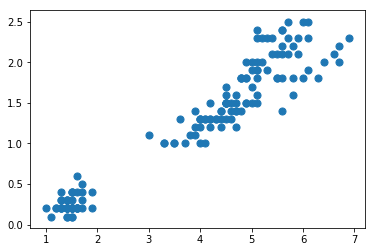

In [3]:
# Plot petal data
X1 = X[:, 0]
X2 = X[:, 1]

plt.scatter(X1, X2, s=50)
plt.show()

In [4]:
def normalise(data):
    (rows, cols) = data.shape # (150, 2)
    
    mins = np.zeros(shape=(cols), dtype=np.float32)
    maxs = np.zeros(shape=(cols), dtype=np.float32)
    
    for col in range(cols):
        mins[col] = np.min(data[: , col])
        maxs[col] = np.max(data[: , col])
        
    norm = np.copy(data)
    
    for row in range(rows):
        for col in range(cols):
            norm[row, col] = (data[row, col] - mins[col]) / (maxs[col] - mins[col])
            
    for col in range(cols):
        mins[col] = np.min(norm[: , col])
        maxs[col] = np.max(norm[: , col])
            
    return norm, mins, maxs

In [25]:
def euclidean_distance(x1, x2):
#     return np.linalg.norm(x1-x2)
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

In [6]:
def SSError(X, K, centorid, clusters):
    error = 0
    for k in range(K):
        error += np.sum((centorid[k] - X[clusters == k]) ** 2)
        
    return error

In [7]:
def gen_centroid(data, K, mins, maxs, random = 20):
    np.random.seed(random)
    centroid_x = np.random.rand(1, 3)
    centroid_y = np.random.rand(1, 3)
    centroid = np.array(list(zip(centroid_x, centroid_y)), dtype=np.float32)
    return centroid

In [8]:
def plot_cluster(data, center):
    
    center.reshape(2, 3)
    
    X1 = data[:, 0]
    X2 = data[:, 1]
    
    # Plot centroid
    plt.scatter(X1, X2, s=50, alpha=0.5)
    plt.scatter(center[:, 0], center[:, 1], marker='*', s=500, c=['r', 'b', 'g'], alpha=1)
    plt.show()

In [9]:
def Kmeans(data, K, n_iter):
    
    (rows, cols) = data.shape

    # define norm
    data, mins, maxs = normalise(data)
    
    # define common value
    std = np.std(data)
    mean = np.mean(data)
    distance = np.zeros((rows, K))
    clusters = np.zeros((rows))
    error = []
    
    
    # define centroid
    centroid = gen_centroid(data, K, mins, maxs)
    # reshape
    centroid = np.reshape(centroid, (3, 2))
    centroid_new = np.zeros(centroid.shape)
    
    
    for time in range(n_iter):
        
        
        # Plot cluster
        plot_cluster(data, centroid)
        
        # each k
        for k in range(K):
            # find point distance to each centroid 
            distance[:, k] = euclidean_distance(centroid[k], data)
            
        # find each point should belong to clusters
        clusters = np.argmin(distance, axis=1)
        
        
        for k in range(K):
            centroid_new[k] = np.mean(data[clusters == k], axis = 0)
        
        # update centroid
        centroid = centroid_new.copy()
        
        # find SSE
        err = SSError(data, K, centroid, clusters)
        error.append(err)
        
    return clusters, centroid, error

In [10]:
# Define norm
norm, mins, maxs = normalise(X)
X1 = norm[:, 0]
X2 = norm[:, 1]

# Define clusters
K = 3

# Define n_inter
n_iter = 10

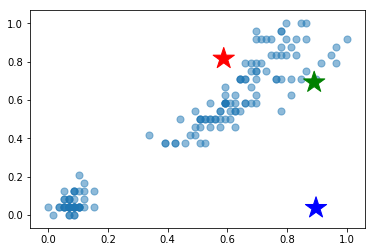

In [11]:
# Define centroid
centroid = gen_centroid(norm, K, mins, maxs)

plot_cluster(norm, centroid)

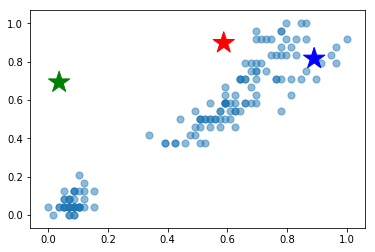

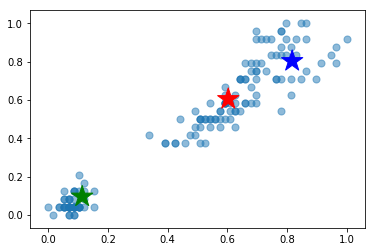

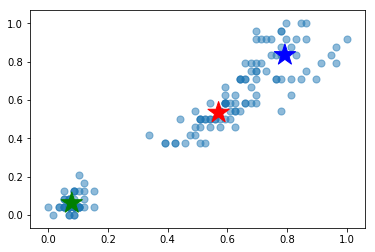

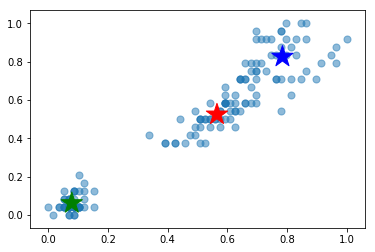

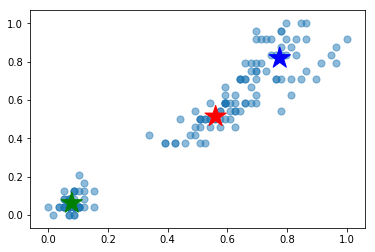

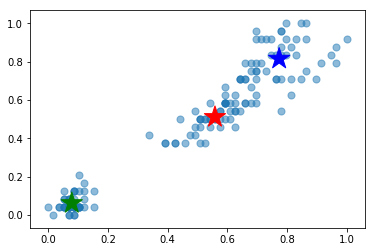

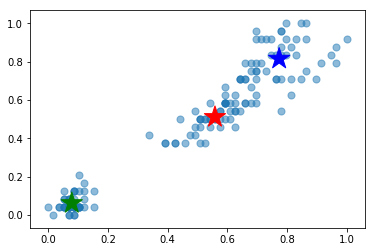

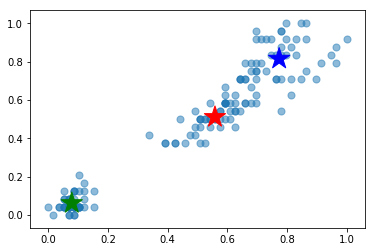

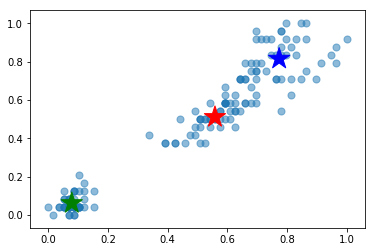

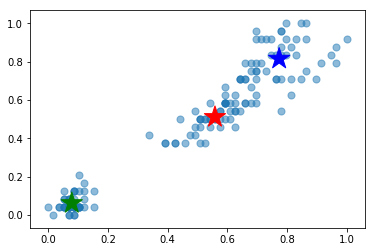

In [12]:
# Train
clusters, centroid, error = Kmeans(X, K, n_iter)

In [13]:
print('Error: ' + str(n_iter), *error, sep="\n")

Error: 10
3.561305423153868
1.7850821753776225
1.7408756410739872
1.707867574471276
1.7018745917599258
1.7018745917599258
1.7018745917599258
1.7018745917599258
1.7018745917599258
1.7018745917599258


In [15]:
iris_cluster = []
for target in clusters:
    if target == 2: 
        iris_cluster.append('setosa')
    elif target == 0: 
        iris_cluster.append('versicolor')
    elif target == 1: 
        iris_cluster.append('virginica')

In [16]:
iris_data = []
for target in iris['target']:
    if target == 0: 
        iris_data.append('setosa')
    elif target == 1: 
        iris_data.append('versicolor')
    elif target == 2: 
        iris_data.append('virginica')

In [19]:
acc = accuracy_score(iris_cluster, iris_data)

accuracy:  96.0%


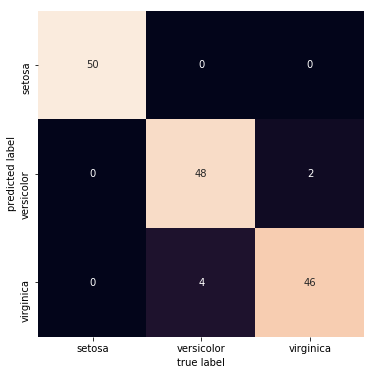

In [24]:
plt.figure(figsize=(16, 6))
mat = confusion_matrix(iris_cluster, iris_data)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris['target_names'],
            yticklabels=iris['target_names'])
plt.xlabel('true label')
plt.ylabel('predicted label');
print('accuracy: ', str(acc*100) + '%')